In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from scipy.sparse import hstack, coo_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns

In [2]:
df_by_post = pd.read_csv('../data/posts.csv')

In [3]:
# Redoing this here because of problems with pickle when switching from pc to mac
labels = {
    #Quarantined subreddits
    'TheRedPill' : -1,

    #apolitical (I think)
    'BlackPeopleTwitter' : 1,
    'WhitePeopleTwitter' : 1,
    'politics' : 0,
    'law' : 0,
    'news' : 0,
    'worldnews' : 0,
    'Jokes' : 0,
    'funny' : 0,
    'gaming' : 0,
    'Games' : 0,
    'technology' : 0,
    'tech' : 0,
    'technews' : 0,
    'gadgets' : 0,
    'space' : 0,
    'science' : 0,
    'nextfuckinglevel' : 0,
    'MurderedByWords' : 0,
    'mildlyinteresting' : 0,
    'Damnthatsinteresting' : 0,
    'mildlyinfuriating' : 0,
    'wallstreetbets' : 0,
    'Superstonk' : 0,
    'shitposting' : 0,
    'pcmasterrace' : 0,
    'teenagers' : 0,
    'PublicFreakout' : 0,
    'memes' : 0,
    'AskReddit' : 0,
    'AskAnAmerican' : 0,
    'Gamingcirclejerk' : 0,
    'nottheonion' : 0,
    'gatesopencomeonin' : 0,
    'wholesomememes' : 0,
    'wholesome' : 0,
    'interestingasfuck' : 0,
    'PoliticalCompassMemes' : 0,
    'PoliticalHumor' : 0,
    'AskMen' : 0,
    'AskWomen' : 0,
    'TooAfraidToAsk' : 0,
    'MadeMeSmile' : 0,
    'rareinsults' : 0,
    'UFOs' : 0,
    'HighStrangeness' : 0,
    'todayilearned' : 0,
    'RoastMe' : 0,
    'CryptoCurrency' : 0,
    'Wellthatsucks' : 0,
    'barstoolsports' : 0,
    'awfuleverything' : 0,
    'unpopularopinion' : 0,
    'atheism' : 0,
    'Christianity' : 0,
    'Catholicism' : 0,
    'changemyview' : 0,
    'Coronavirus' : 0,
    'COVID19' : 0,
    'coronavirusNYC' : 0,
    'Masks4All' : 1,
    'consipiratard' : 0,
    'environment' : 1,
    'environment2' : 1,
    'TrollXChromosomes' : 1,
    'TrollYChromosome' : 0,
    'WikiLeaks' : -1,
    '4chan' : 0,
    'greentext' : 0,
    'NoStupidQuestions' : 0,
    'offmychest' : 0,
    'texas' : 1,
    'TexasPolitics' : 1,
    'CanadaPolitics' : 0,
    'florida' : 0,
    'terriblefacebookmemes' : 0,
    'insanepeoplefacebook' : 0,
    'ShitMomGroupsSay' : 0,
    'masskillers' : 0,
    'Parenting' : 0,
    'Marriage' : 0,
    'neoliberal' : 1,
    'spacex' : 0,
    'savedyouaclick' : 0,
    'socialmedia' : 0,
    'moderatepolitics' : 0,
    'virginvschad' : -1,
    'CoronavirusCirclejerk' : -1,
    'dankmemes' : 0,
    'Memes_Of_The_Dank' : 0,
    'OutOfTheLoop' : 0,
    'dataisbeautiful' : 0,

    #left (I think)
    'democrats' : 1,
    'antiwork' : 1,
    'Anticonsumption' : 1,
    'SelfAwarewolves' : 1,
    'niceguys' : 1,
    'onejoke' : 1,
    'Feminism' : 1,
    'WitchesVsPatriarchy' : 1,
    'AreTheStraightsOK' : 1,
    'ToiletPaperUSA' : 1,
    'LeopardsAteMyFace' : 1,
    'TwoXChromosomes' : 1,
    'Anarchism' : 1,
    'TopMindsOfReddit' : 1,
    'esist' : 1,
    'MarchAgainstNazis' : 1,
    'exredpill' : 1,
    'MensLib' : 1,
    'lgbt' : 1,
    'gay' : 1,
    'bisexual' : 1,
    'AgainstHateSubreddits' : 1,
    'traaaaaaannnnnnnnnns' : 1,
    'trans' : 1,
    'GenderCynical' : 1,
    'EnoughTrumpSpam' : 1,
    'ABoringDystopia' : 1,
    'boringdystopia' : 1,
    'pointlesslygendered' : 1,
    'Persecutionfetish' : 1,
    'TheRightCantMeme' : 1,
    'MurderedByAOC' : 1,
    'LateStageCapitalism' : 1,
    'TheBluePill' : 1,
    'justneckbeardthings' : 1,
    'NotHowGirlsWork' : 1,
    'CapitalismSux' : 1,
    'GreenAndPleasant' : 1,
    'religiousfruitcake' : 1,
    'FragileWhiteRedditor' : 1,
    'Trumpvirus' : 1,
    'socialism' : 1,
    'asktransgender' : 1,
    'SandersForPresident' : 1,
    'MtF' : 1,
    'ftm' : 1,
    'egg_irl' : 1,
    'NonBinary' : 1,
    'HermanCainAward' : 1,
    'lostgeneration' : 1,
    'stupidpol' : 1,
    'Qult_Headquarters' : 1,
    'IncelTear' : 1,
    'ParlerWatch' : 1,
    'ShitLiberalsSay' : 1,
    'Hasan_Piker' : 1,
    'DemocraticSocialism' : 1,
    'SapphoAndHerFriend' : 1,

    #right (I think)
    'JoeRogan' : -1,
    'okbuddyretard' : -1,
    'okmatewanker' : -1,
    'pussypassdenied' : -1,
    'antifeminists' : -1,
    'MensRights' : -1,
    'ProudMaleFeminists' : -1,
    'WhereAreTheFeminists' : -1,
    'FeminismUncensored' : -1,
    'SRSsucks' : -1,
    'Conservative' : -1,
    'JordanPeterson' : -1,
    'conspiracy' : -1,
    'conspiracy_commons' : -1,
    'tucker_carlson' : -1,
    'TheTrumpZone' : -1,
    'LouderWithCrowder' : -1,
    'Libertarian' : -1,
    'AskThe_Donald' : -1,
    'walkaway' : -1,
    'ConservativesOnly' : -1,
    'IncelsCircleJerk' : -1,
    'BlackPillScience' : -1,
    'Blubber_Whaling' : -1,
    'memegender' : -1,
    'SocialJusticeInAction' : -1,
    'FreeSpeech' : -1,
    'libsofreddit' : -1,
    'EnoughCommieSpam' : -1,
    'TheLeftCantMeme' : -1,
    'Anarcho_Capitalism' : -1,
    'ar15' : -1,
    'guns' : -1,
    'canadaguns' : -1,
    'progun' : -1,
    'gunpolitics' : -1,
    'Firearms' : -1,
    'CCW' : -1,
    'Glocks': -1,
    'tacticalgear' : -1,
    'liberalgunowners' : -1,
    'HillaryForPrison' : -1,
    'Offensivejokes' : -1,
    'climateskeptics' : -1,
    'LockdownCriticalLeft' : -1,
    'FightingFakeNews' : -1,
    'Republican' : -1
}

In [4]:
# Apply hand labels to data
df_by_post['alignment'] = df_by_post['subreddit'].apply(lambda x: labels[x])

In [5]:
# grab the clustering labels
agg_label_df = pd.read_pickle('../data/agg_labels.pkl')

In [6]:
agg_label_df['subreddit'] = agg_label_df.index

In [7]:
agg_label_df.head()

,text,k_means_labels,agg_labels,subreddit
TheRedPill,google fire ph.d biologist/engineer claiming a...,4,3,TheRedPill
BlackPeopleTwitter,wildest trend imo corjay lmao_shippuden inco l...,3,2,BlackPeopleTwitter
WhitePeopleTwitter,solution obvious shooting foot secular talk vv...,3,2,WhitePeopleTwitter
politics,megathread joe biden projected defeat presiden...,1,14,politics
law,law school leaked draft dobbs opinion justice ...,1,14,law


In [8]:
df_by_post['agg_label'] = df_by_post['subreddit'].apply(lambda x: agg_label_df['agg_labels'].loc[x])

In [9]:
df_by_post.head()

,Unnamed: 0,created_utc,subreddit,subreddit_subscribers,name_code,upvote_ratio,num_comments,url,image?,total_text,tokenned_stopped_text,finalized_text,alignment,agg_label
0,0,1.502177e+09,TheRedPill,0.0,t3_6sbx6i,0.65,840.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,Google Fires Ph.D Biologist/Engineer For Claim...,"['google', 'fire', 'ph.d', 'biologist/engineer...",google fire ph.d biologist/engineer claiming a...,-1,3
1,1,1.480424e+09,TheRedPill,0.0,t3_5fihmu,0.83,760.0,https://www.reddit.com/r/TheRedPill/comments/5...,False,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"['laid', 'warlord', '37', 'rule', 'approaching...",laid warlord 37 rule approaching model-tier gi...,-1,3
2,2,1.502101e+09,TheRedPill,0.0,t3_6s4mfa,0.86,179.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,I have been practicing Stoicism for 3 years no...,"['practicing', 'stoicism', 'year', 'quality', ...",practicing stoicism year quality life increase...,-1,3
3,3,1.433962e+09,TheRedPill,0.0,t3_39bvdm,0.87,954.0,https://www.reddit.com/r/TheRedPill/comments/3...,False,"[META] Reddit rolls out first ban wave of ""Har...","['meta', 'reddit', 'roll', 'first', 'ban', 'wa...",meta reddit roll first ban wave harassing subr...,-1,3
4,4,1.500270e+09,TheRedPill,0.0,t3_6nr5yo,0.90,336.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,"Man gets his ex-GF to pay child support, and R...","['man', 'get', 'ex-gf', 'pay', 'child', 'suppo...",man get ex-gf pay child support reddit freak k...,-1,3


In [10]:
#Clean up the data little bit
predicting_df = df_by_post.drop(columns = ['url', 'subreddit_subscribers', 'total_text', 'tokenned_stopped_text', 'created_utc', 'subreddit', 'Unnamed: 0'])

In [11]:
#Switch image to a float for modeling
predicting_df['image?'] = predicting_df['image?'].astype('float64')

In [12]:
predicting_df.head()

,name_code,upvote_ratio,num_comments,image?,finalized_text,alignment,agg_label
0,t3_6sbx6i,0.65,840.0,0.0,google fire ph.d biologist/engineer claiming a...,-1,3
1,t3_5fihmu,0.83,760.0,0.0,laid warlord 37 rule approaching model-tier gi...,-1,3
2,t3_6s4mfa,0.86,179.0,0.0,practicing stoicism year quality life increase...,-1,3
3,t3_39bvdm,0.87,954.0,0.0,meta reddit roll first ban wave harassing subr...,-1,3
4,t3_6nr5yo,0.90,336.0,0.0,man get ex-gf pay child support reddit freak k...,-1,3


In [13]:
# Get rid of any nans
predicting_df = predicting_df.dropna()

In [14]:
predicting_df.isna().value_counts()

name_code  upvote_ratio  num_comments  image?  finalized_text  alignment  agg_label
False      False         False         False   False           False      False        32412
dtype: int64

# Modeling on Posts

In [15]:
#Split before modeling to avoid leakage
X = predicting_df.drop(columns = ['alignment'])
y = predicting_df['alignment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 305)

In [16]:
# Create feature union out of vectorizer for text and scaler for floats
count_vectorizer = CountVectorizer(min_df = 2)
scaler = StandardScaler()

count_transformer = ColumnTransformer(transformers = [('count_vect', count_vectorizer, 'finalized_text')])
scaler_transformer = ColumnTransformer(transformers = [('scaler', scaler, ['upvote_ratio', 'num_comments', 'image?'])])

unifier = FeatureUnion(transformer_list = [('count_transformer', count_transformer), ('scaler_transformer', scaler_transformer)])

In [17]:
# Decision Tree model, as a basic dummy model
dtree = DecisionTreeClassifier()

dpipe = Pipeline(steps = [
    ('feature_union', unifier),
    ('model', dtree)
 ])


In [18]:
# fit model
dpipe.fit(X_train, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('count_transformer',
                                                 ColumnTransformer(transformers=[('count_vect',
                                                                                  CountVectorizer(min_df=2),
                                                                                  'finalized_text')])),
                                                ('scaler_transformer',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  StandardScaler(),
                                                                                  ['upvote_ratio',
                                                                                   'num_comments',
                                                                                   'image?'])]))])),
                ('model',

              precision    recall  f1-score   support

          -1       0.53      0.54      0.53      1479
           0       0.72      0.71      0.72      2767
           1       0.57      0.57      0.57      2237

    accuracy                           0.62      6483
   macro avg       0.60      0.61      0.61      6483
weighted avg       0.62      0.62      0.62      6483



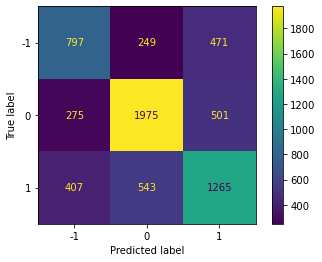

In [19]:
# Get model metrics
plot_confusion_matrix(dpipe, X_test, y_test)

print(classification_report(dpipe.predict(X_test), y_test))

In [20]:
# Random Forest Model with 500 trees
dforest = RandomForestClassifier(n_estimators = 500)

dforest_pipe = Pipeline(steps = [
    ('feature_union', unifier),
    ('model', dforest)
 ])

dforest_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('count_transformer',
                                                 ColumnTransformer(transformers=[('count_vect',
                                                                                  CountVectorizer(min_df=2),
                                                                                  'finalized_text')])),
                                                ('scaler_transformer',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  StandardScaler(),
                                                                                  ['upvote_ratio',
                                                                                   'num_comments',
                                                                                   'image?'])]))])),
                ('model',

              precision    recall  f1-score   support

          -1       0.57      0.70      0.63      1218
           0       0.83      0.78      0.81      2924
           1       0.71      0.67      0.69      2341

    accuracy                           0.73      6483
   macro avg       0.70      0.72      0.71      6483
weighted avg       0.74      0.73      0.73      6483



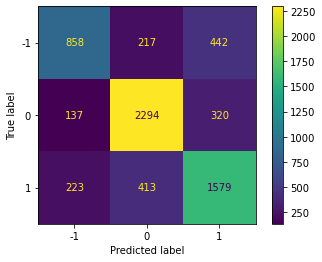

In [21]:
plot_confusion_matrix(dforest_pipe, X_test, y_test)

print(classification_report(dforest_pipe.predict(X_test), y_test))

In [22]:
# Trying a bagging classifier
dbag = BaggingClassifier(n_estimators = 50, bootstrap= True, warm_start= True, random_state = 305)

dbag_pipe = Pipeline(steps = [
    ('feature_union', unifier),
    ('model', dbag)
 ])

dbag_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('count_transformer',
                                                 ColumnTransformer(transformers=[('count_vect',
                                                                                  CountVectorizer(min_df=2),
                                                                                  'finalized_text')])),
                                                ('scaler_transformer',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  StandardScaler(),
                                                                                  ['upvote_ratio',
                                                                                   'num_comments',
                                                                                   'image?'])]))])),
                ('model',

              precision    recall  f1-score   support

          -1       0.51      0.62      0.56      1247
           0       0.78      0.75      0.76      2882
           1       0.65      0.61      0.63      2354

    accuracy                           0.67      6483
   macro avg       0.65      0.66      0.65      6483
weighted avg       0.68      0.67      0.67      6483



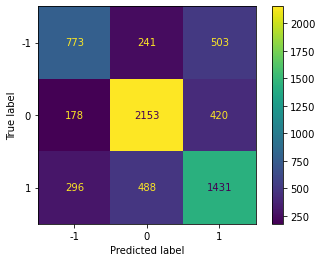

In [23]:
# It isn't as good as the random forest
plot_confusion_matrix(dbag_pipe, X_test, y_test)

print(classification_report(dbag_pipe.predict(X_test), y_test))

In [24]:
# bpipe_params = {
#     'model__bootstrap': [True, False],
#     'model__bootstrap_features': [True, False],
#     'model__n_estimators': [100, 120, 140]
# }

# bpipe_grid = RandomizedSearchCV(dbag_pipe, bpipe_params, cv=4, verbose = 10)

In [25]:
# bpipe_grid.fit(X_train, y_train)

# bpipe_grid.best_estimator_

# Accuracy over Subreddits

In [26]:
# Random Forest is the best model
preds = dforest_pipe.predict(X)

In [27]:
len(preds)

32412

In [28]:
df_by_post = df_by_post.dropna()

In [29]:
df_by_post['pred_alignment'] = preds

In [30]:
# Get aggregate accuracy by subreddit 
accuracy_df = df_by_post.groupby('subreddit').mean()

In [31]:
neg_acc_df =accuracy_df.loc[accuracy_df['alignment'] == -1].sort_values(by = 'pred_alignment')

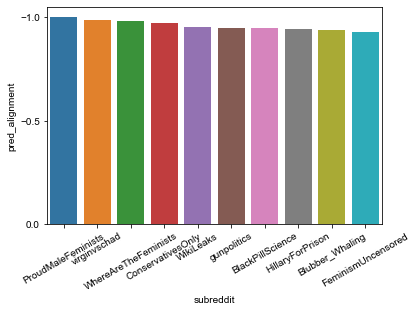

In [32]:
# Most accurate at risk subs
ax = sns.barplot(x = neg_acc_df.index[0:10]  , y = neg_acc_df['pred_alignment'][0:10])

sns.set(rc = {'figure.figsize': (30,8) } )
sns.set_context('poster')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax.invert_yaxis()

In [33]:
neg_acc_df.iloc[::-1][0:10]['pred_alignment']

subreddit
LouderWithCrowder       -0.695238
pussypassdenied         -0.707071
tucker_carlson          -0.715000
libsofreddit            -0.715686
CoronavirusCirclejerk   -0.733945
walkaway                -0.736000
SocialJusticeInAction   -0.758333
memegender              -0.760000
MensRights              -0.775000
Libertarian             -0.776042
Name: pred_alignment, dtype: float64

[(0.0, -1.0)]

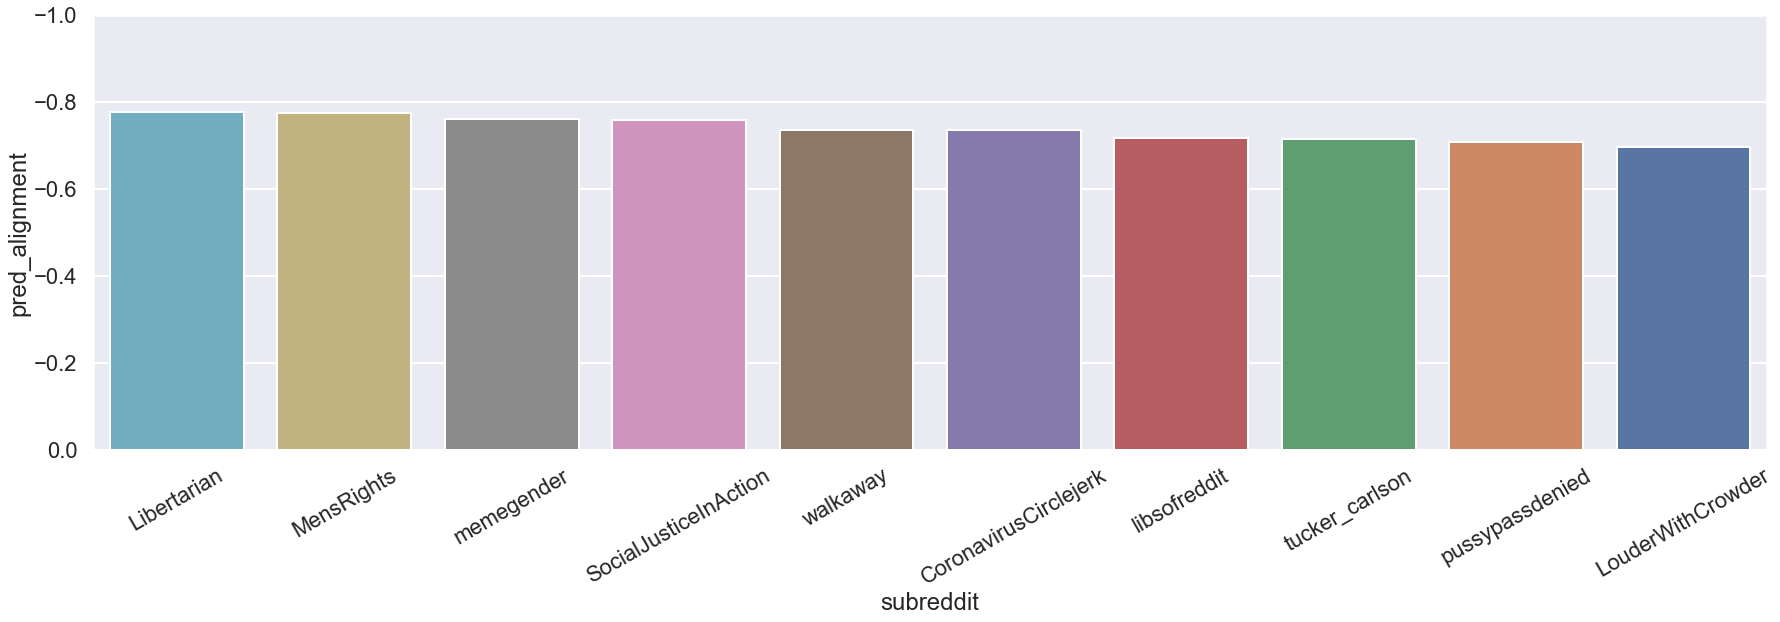

In [34]:
# Least accurate at risk subreddits
ax = sns.barplot(x = neg_acc_df.index[::-1][0:10]  , y = neg_acc_df['pred_alignment'][::-1][0:10])

sns.set(rc = {'figure.figsize': (30,8) } )
sns.set_context('poster')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax.invert_yaxis()
ax.invert_xaxis()
ax.set(ylim = (0,-1))

In [35]:
df_by_post.loc[df_by_post['subreddit'] == 'gunpolitics'].iloc[25].filter(items=['subreddit','total_text','alignment', 'pred_alignment'])

subreddit                                               gunpolitics
total_text        This man was killed for answering the door as ...
alignment                                                        -1
pred_alignment                                                   -1
Name: 30509, dtype: object